dataset shape (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

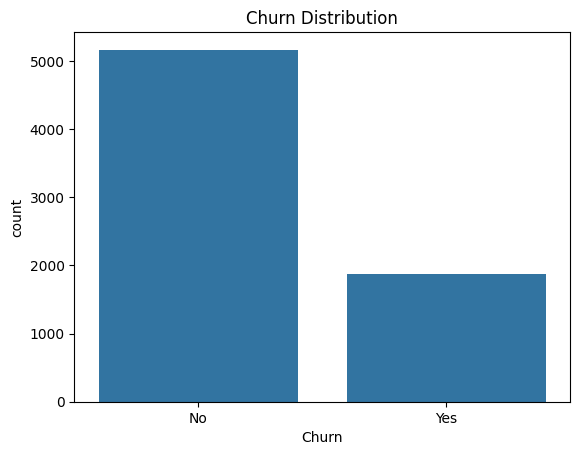

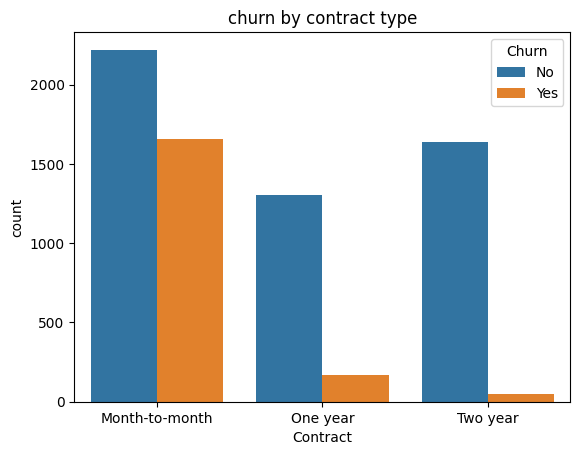

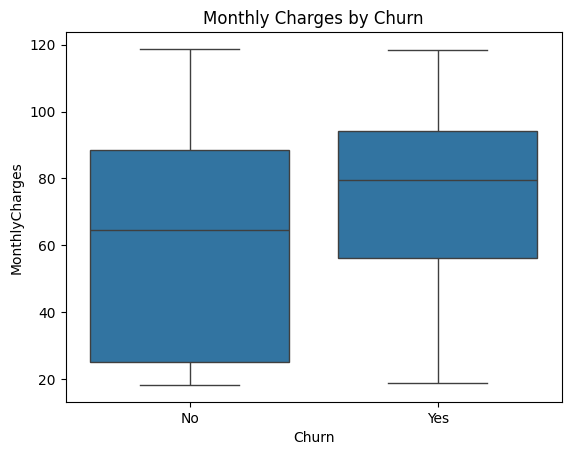

Logistic Regression(SMOTE) evaluation: 

[[884 133]
 [185 205]]
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1017
        True       0.61      0.53      0.56       390

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407

 Random Forest (SMOTE) Evaluation:

[[930  87]
 [214 176]]
              precision    recall  f1-score   support

       False       0.81      0.91      0.86      1017
        True       0.67      0.45      0.54       390

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [7]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# data cleaning
print("dataset shape",df.shape)
df.head()
df.info()
print(df.isnull().sum())
df = df.drop('customerID', axis=1)
df['total charges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# visualization
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('churn by contract type')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data = df)
plt.title('Monthly Charges by Churn')
plt.show()

#encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Train-Test split
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# logistic regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# evaluation
y_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression(SMOTE) evaluation: \n")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# random forest ML model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test_scaled)

print(" Random Forest (SMOTE) Evaluation:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
